This notebook covers the topic of quantum AI algorithms. You can see how quantum AI algorithms are implemented in day-to-day life. Code examples are presented for specific algorithms such as quantum probability, quantum walks, quantum search, quantum deep learning, and quantum parallelism.

**Quantum Probability** 

A quantum computation framework has probability-based events that are modeled as Hilbert multidimensional subspaces. The system in context is referred to as a state vector in Hilbert space. Event probabilities are computed by using vector projection on subspaces and calculating the projection length squared.

Quantum probability is based on mathematical quantum theory. A quantum probability space represents a system that is not well known in physical space.

**Note** Quantum probability is based on Von Neumann axioms and relaxed constraints, which are based on Kolmogorov probability.

**Quantum Walks** 

Quantum walks are based on the traversal of the quantum particle, which is in a superposition state. The probabilities are associated with the left and right movements. The sum of the probabilities of the superposition states is not unitary. A quantum walk is based on a particle’s spin. A random quantum walk is possible by rotating the particle with spin. Quantum walks are used for creating quantum algorithms based on the quantum computation model. There are two types of quantum walks: discrete-time and continuous-time quantum walks.

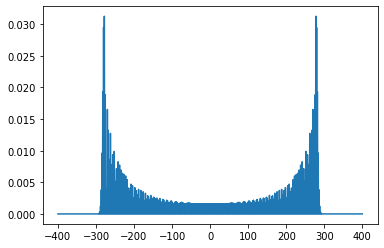

In [ ]:
# Coin Toss Quantum Walk:

import math
import pylab as pythonLab


def GetProbabilities(posn):
    
    return [sum([abs(amp) ** 2 for amp in place]) for place in posn]


def ApplyNormalisation(posn):
    
    N = math.sqrt(sum(GetProbabilities(posn)))
    return [[amp / N for amp in place] for place in posn]


def GetTimeStep(posn):
    
    return ApplyNormalisation([[x[0] + x[1], x[0] - x[1]] for x in posn])


def GetShift(coin):
    
    newposn = [[0, 0] for i in range(len(coin))]
    for j in range(1, len(position) - 1):
        newposn[j + 1][0] += coin[j][0]
        newposn[j - 1][1] += coin[j][1]
    return ApplyNormalisation(newposn)


minval, maxval = -400, 401
position = [[0, 0] for i in range(minval, maxval)]
position[-minval] = [1 / math.sqrt(2), 1j / math.sqrt(2)]

for time in range(-minval):
    position = GetShift(GetTimeStep(position))

pythonLab.plot(range(minval, maxval), GetProbabilities(position))
pythonLab.show()

The quantum walk explores numerous different paths and when these paths meet somewhere they don’t have to add together, instead they can subtract from one another because of interference. The resulting distribution is quite interesting, and it’s very different from the the classical one, the normal distribution. The quantum walk has these strange peaks on either side and is actually quite low in the middle because of the interference. This is interesting because in traditional finance theory we’re always thinking about everything being normally distributed, so prices stay close to their starting point. But while this might be objectively fairly accurate, when you think about the mental frame of investors it’s quite different. [2]

**Continuous-time quantum walk**

A continuous-time quantum walk is based on the Markov process. A Markov process is modeled as a graph with M vertices that are connected to others with an edge. Assume γ is the jumping rate per unit time between the vertices. The constraint is that the walk is between the nodes on the edge. The walk is represented by stochastic generator matrix P. The sum of the overlap integrals squared across all vertices is 1.

A quantum walk is modeled using a quantum mechanical wave function. The wave function is coherent superposition of all possible wave paths. The probability distribution is based on the quantum interference effects. Quantum walks help in solving real-life problems, and they are faster in polynomial order of time. The problems such as element distinctness, identifying triangle, and NAND tree evaluation are solved using quantum walks. Grover’s search algorithm can be modeled as a quantum walk algorithm.[1]

In [ ]:
!pip install qutip
from qutip import *
import numpy as nump
import matplotlib.pyplot as matplot
from math import *
import seaborn as seabrn

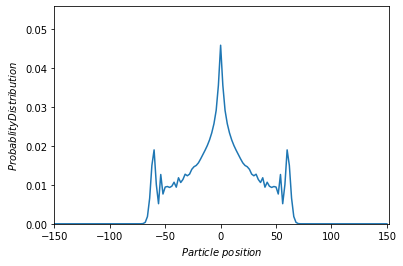

In [5]:
# Continous Quantum Walk

ket0 = basis(2,0).unit() 
ket1 = basis(2,1).unit() 
psip = (basis(2,0)+basis(2,1)*1j).unit() 
psim = (basis(2,0)-basis(2,1)*1j).unit() 

def GetCoin(coin_angle):
    C_hat = qutip.Qobj([[cos(radians(coin_angle)), sin(radians(coin_angle))],  
                     [sin(radians(coin_angle)), -cos(radians(coin_angle))]])
    return C_hat

def GetShift(t):
    sites = 2*t+1
    shift_l = qutip.Qobj(nump.roll(nump.eye(sites), 1, axis=0)) 
    shift_r = qutip.Qobj(nump.roll(nump.eye(sites), -1, axis=0)) 
    S_hat = tensor(ket0*ket0.dag(),shift_l) + tensor(ket1*ket1.dag(),shift_r) 
    return S_hat

def GetWalk(t,coin_angle):
    sites = 2*t+1
    C_hat = GetCoin(coin_angle) 
    S_hat = GetShift(t)     
    W_hat = S_hat*(tensor(C_hat,qeye(sites))) 
    return W_hat

def ApplyDephasing(t,qstate,p_c):
    sites=2*t+1
    dstate = (1-p_c)*qstate+p_c*(tensor(sigmaz(),qeye(sites))*qstate*tensor(sigmaz(),qeye(sites)))
    return dstate

def ApplyDepolarization(t,qstate,p_c):
    sites=2*t+1
    dstate = (1-p_c)*qstate+p_c/3*(tensor(sigmax(),qeye(sites))*(qstate)*tensor(sigmax(),qeye(sites))*
                           tensor(sigmay(),qeye(sites))*(qstate)*tensor(sigmay(),qeye(sites))*
                           tensor(sigmaz(),qeye(sites))*(qstate)*tensor(sigmaz(),qeye(sites)))
    return dstate



def GetQWalk_gen_markov(t,qubit_state,coin_angle,p_c):
    sites=2*t+1
    Position_state = basis(sites,t)           
    Psi = ket2dm(tensor(qubit_state,Position_state))   
    W_hat = GetWalk(t,coin_angle)                       
    for i in range(t):                               
        Psi = W_hat*ApplyDephasing(t,Psi,p_c)*W_hat.dag() 
    return Psi                                      

def GetMeasurement(t,Psi,z):
    sites=2*t+1
    prob=[]
    for i in range(0,sites,z):
        M_p = basis(sites,i)*basis(sites,i).dag()
        Measure = tensor(qeye(2),M_p)                  
        p = abs((Psi*Measure).tr())                   
        prob.append(p)
    return prob


def GetPlotParticlePos(P_p):
    lattice_positions = range(-len(P_p)+1,len(P_p)+1,2)
    matplot.plot(lattice_positions,P_p)
    matplot.xlim([-len(P_p)+1,len(P_p)+1])           
    matplot.ylim([min(P_p),max(P_p)+0.01])
    matplot.ylabel(r'$Probablity Distribution$')
    matplot.xlabel(r'$Particle \ position$')
    matplot.show()


Psi_t = GetQWalk_gen_markov(150,psip,65,0.01) 
P_p  = GetMeasurement(150,Psi_t,2)             
GetPlotParticlePos(P_p)

References: 
[1] Bhagvan Kommadi Ph.D
[2] Dr. David Orrell